In [3]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.optimize as optimize
import scipy.stats as stats
import math
%matplotlib inline
# 4.1 Understanding the Model
## 4.1.1 Differential Spectrum
# Global Constants
C = 1.433488 * 10 ** (-13)      # Prefactor
me = 0.51099895 * 10**(6) # in MeV/c^2     # Electron mass (in eV)
alpha = 1/137.035999084  # Fine structure constant
def fermi_function(beta: float) -> float:
    """Approximation of the relativistic fermi function.
    
    Parameters
    ----------
    beta: Relativisstic beta factor."""
    eta = 2 * alpha/beta 
    return 2 * math.pi * eta * (1.002037 - 0.001427 * beta)/ (1 - math.e**(-2 * math.pi * eta)) # Formula for fermi function

In [4]:
def differential_spectrum(E: float, mnu2: float, E0: float) -> float:
    """Differential spectrum.
    
    Parameters
    ----------
    E: Electron energy.
    mnu2: Neutrino mass squared.
    E0: Endpoint.
    
    Returns
    ----------
    Differential rate.
    """
    # Calculate approximations
    E_tot = E + me
    p = np.sqrt(E_tot ** 2 - me **2)
    beta = E_tot / p
    F = fermi_function(beta)
    # Calculate mnu
    mnu = np.sqrt(mnu2*np.heaviside(mnu2, 0))
    # Calculation differential rate
    # C * F * p * (E + me) * (E0 - E) * np.sqrt((E0 - E)**2 - mnu2) * THETA(E0 - E - mnu)
    return np.nan_to_num(C * F * p * (E + me) * (E0 - E) * np.sqrt((E0 - E)**2 - mnu2) * np.heaviside(E0 - E - mnu, 0))
    # insert formula for the differential spectrum - equation (2.5)

/var/folders/3m/_6b6k8dj2yb6zzmddc6b10jh0000gn/T/ipykernel_53659/1362707157.py:23: RuntimeWarning: invalid value encountered in sqrt
  return np.nan_to_num(C * F * p * (E + me) * (E0 - E) * np.sqrt((E0 - E)**2 - mnu2) * np.heaviside(E0 - E - mnu, 0))


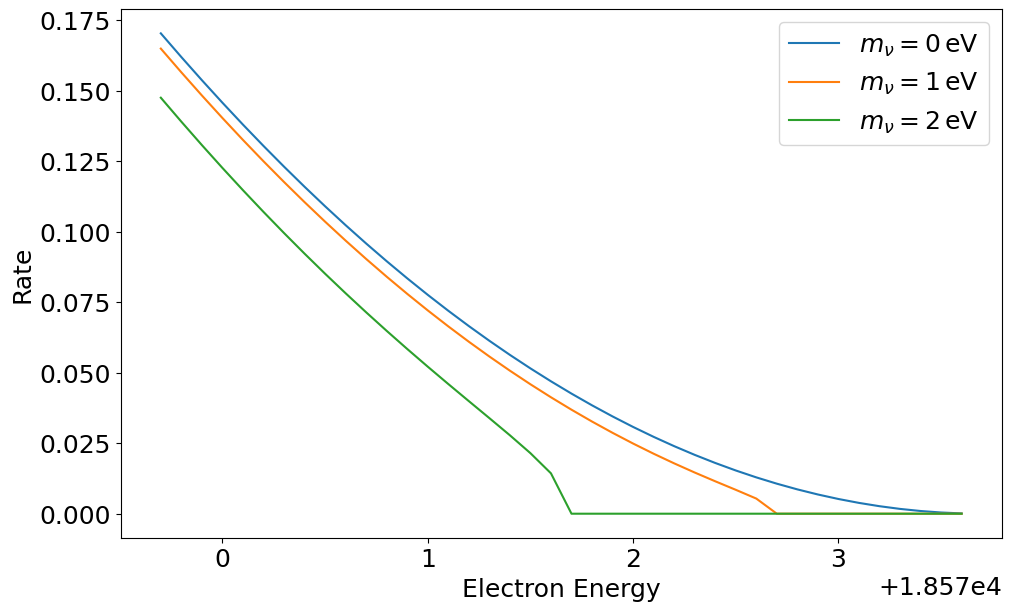

In [5]:
# positive neutrino masses
plt.rcParams.update({'font.size':18});
fig, ax = plt.subplots(constrained_layout=True, figsize=(10,6));
x = np.array(np.arange(18569.7, 18573.7, 0.1)) # energy values where the differential spectrum is evaluated
for mnu in [0, 1, 2]: # neutrino masses
    y = differential_spectrum(E=x, mnu2 =mnu**2, E0=18573.7)
    ax.plot(x, y, '-', label=r"$m_{\nu}=$"+f"{mnu:.0f}"+r"$\,$eV");
ax.legend();
plt.locator_params(axis='x', nbins=5);
ax.set_xlabel("Electron Energy")
ax.set_ylabel("Rate");

In [6]:
### 4.1.2 Transmission function ###

In [7]:
def transmission(qU, E, *, B_ana=6.3E-4, B_max=4.23, B_source=2.52) -> float:
    """Transmission function of the spectrometer.
    
    Parameters
    ----------
    qU: Retarding energy.
    E: Electron energy.
    Bana: Magnetic field in the analyzing plane.
    Bmax: Maximal magnetic field.
    Bsource: Magnetic field in the source.
    
    Returns
    ----------
    Transmission probability.
    """
    # Compute relativistic factor
    f = ((E-qU)/(me)+2)/((E)/(me)+2)
    # Compute slope part of transmission
    T = np.nan_to_num((1-np.sqrt(1-f * (B_source)/(B_ana)*(E-qU)/(E)))/(1-np.sqrt(1-(B_source)/(B_max))))
    # Put everything together with heaviside functions
    return np.heaviside(E-qU, 1)*T*np.heaviside(qU*f*B_max/(f*B_max - B_ana)-E,1)+np.heaviside(E-qU*f*B_max/(f*B_max - B_ana),0)


/var/folders/3m/_6b6k8dj2yb6zzmddc6b10jh0000gn/T/ipykernel_53659/3521736005.py:19: RuntimeWarning: invalid value encountered in sqrt
  T = np.nan_to_num((1-np.sqrt(1-f * (B_source)/(B_ana)*(E-qU)/(E)))/(1-np.sqrt(1-(B_source)/(B_max))))


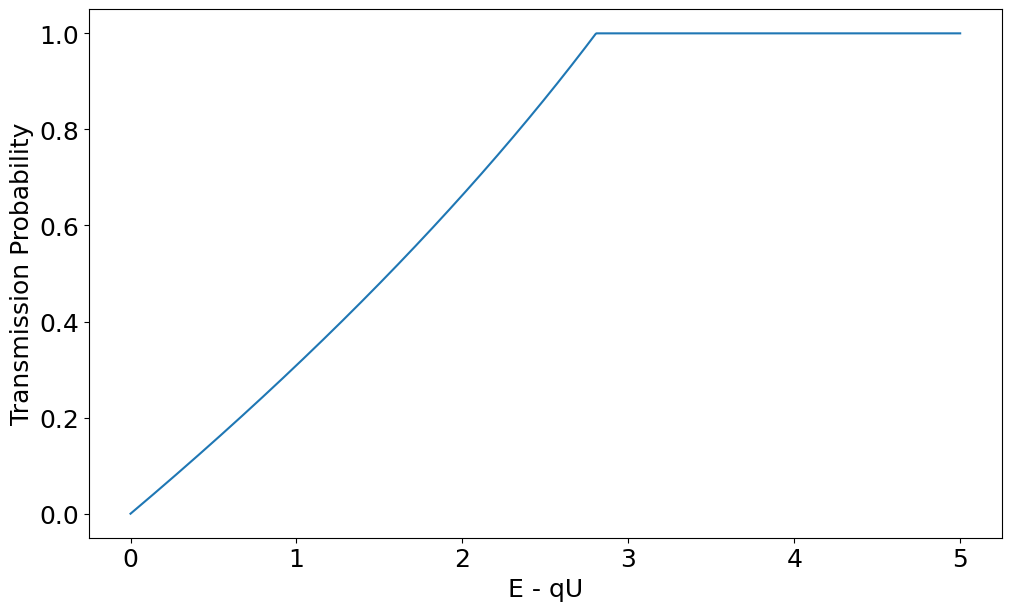

In [8]:
plt.rcParams.update({'font.size':18});
fig, ax = plt.subplots(constrained_layout=True, figsize=(10,6));

qU = 18500 # the qU should be close to the tritium endpoint but not higher
x = np.linspace(18500, 18505, 1000) # the energy ranging from values smaller than qU to larger than qU
y = transmission(qU=qU, E=x, B_ana=6.3E-4, B_max=4.23, B_source=2.52)

ax.plot(x-qU, y, '-');
plt.locator_params(axis='x', nbins=7);
ax.set_xlabel("E - qU")
ax.set_ylabel("Transmission Probability");

/var/folders/3m/_6b6k8dj2yb6zzmddc6b10jh0000gn/T/ipykernel_53659/3521736005.py:19: RuntimeWarning: invalid value encountered in sqrt
  T = np.nan_to_num((1-np.sqrt(1-f * (B_source)/(B_ana)*(E-qU)/(E)))/(1-np.sqrt(1-(B_source)/(B_max))))


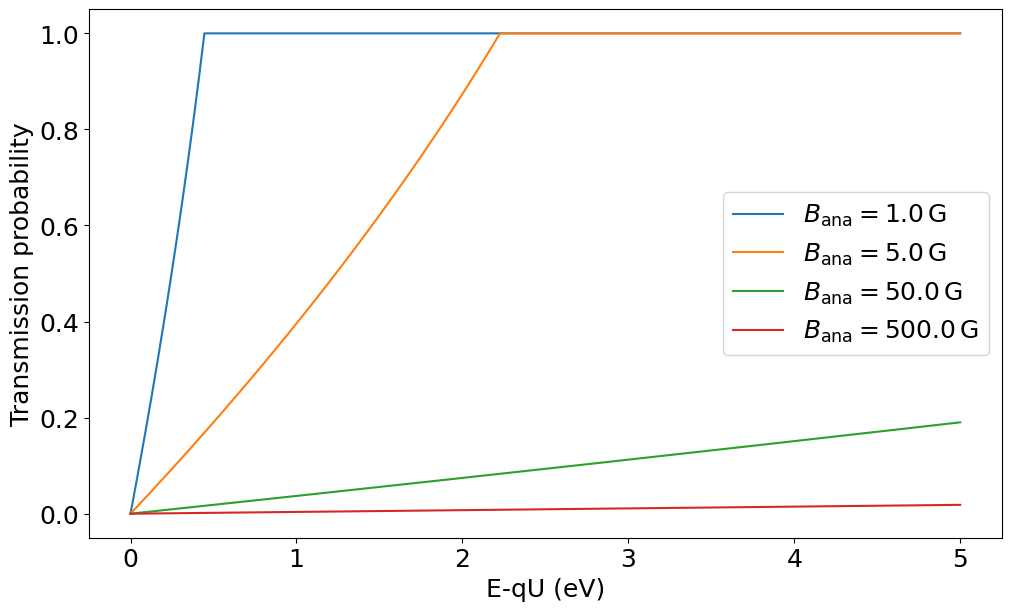

In [9]:
# transmission function for different Bana
plt.rcParams.update({'font.size':18});
fig, ax = plt.subplots(constrained_layout=True, figsize=(10,6));

qU = 18500
x = np.linspace(18500, 18505, 1000)

for Bana in [1.0E-4, 5.0E-4, 5.0E-3, 5.0E-2]: # insert different Bana values
    y = transmission(qU=qU, E=x, B_ana=Bana, B_max=4.23, B_source=2.52)
    ax.plot(x-qU, y, '-', label=r"$B_{\mathrm{ana}}=%s \,$G"%f"{Bana*1E4:.1f}");

ax.legend();
plt.locator_params(axis='x', nbins=7);
ax.set_xlabel("E-qU (eV)")
ax.set_ylabel("Transmission probability");

/var/folders/3m/_6b6k8dj2yb6zzmddc6b10jh0000gn/T/ipykernel_53659/3521736005.py:19: RuntimeWarning: invalid value encountered in sqrt
  T = np.nan_to_num((1-np.sqrt(1-f * (B_source)/(B_ana)*(E-qU)/(E)))/(1-np.sqrt(1-(B_source)/(B_max))))


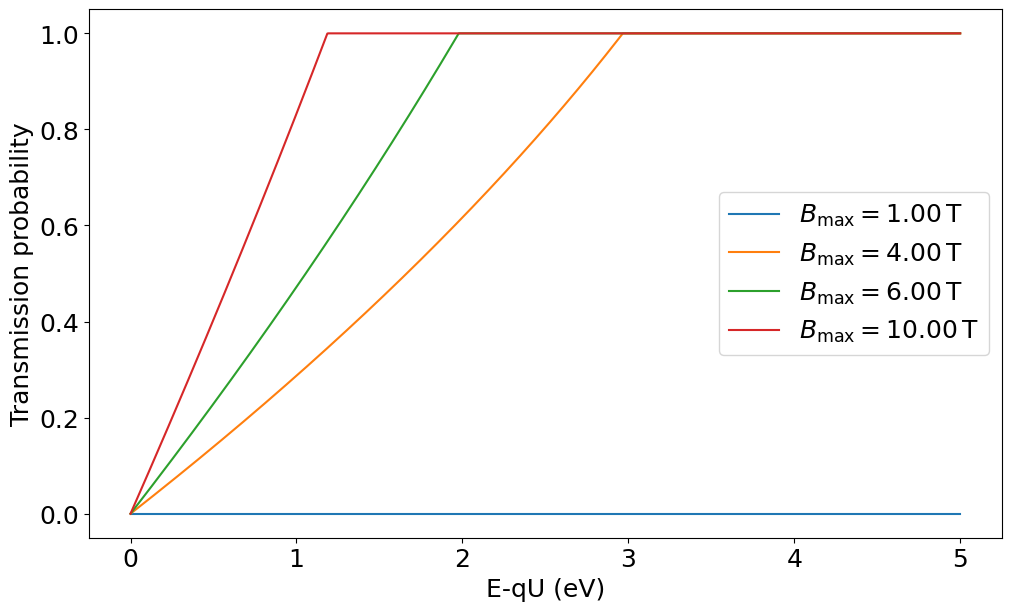

In [10]:
# transmission function for different Bmax
plt.rcParams.update({'font.size':18});
fig, ax = plt.subplots(constrained_layout=True, figsize=(10,6));

qU = 18500
x = np.linspace(18500, 18505, 1000)

for Bmax in [1, 4, 6, 10]: # insert different Bmax values
    y = transmission(qU=qU, E=x, B_ana=6.3E-4, B_max=Bmax, B_source=2.52)
    ax.plot(x-qU, y, '-', label=r"$B_{\mathrm{max}}=%s \,$T"%f"{Bmax:.2f}");

ax.legend();
plt.locator_params(axis='x', nbins=7);
ax.set_xlabel("E-qU (eV)")
ax.set_ylabel("Transmission probability");

In [11]:
### 4.1.3 Dummy model ###

In [12]:
### 4.2 Basics of Data Analysis ###

In [13]:
def simplified_model(E: float, mnu2: float, E0: float, B: float, N: float) -> float:
    """Simplified (differential) model.
    
    Parameters
    ----------
    E: Energy.
    mnu2: Neutrino mass squared.
    E0: Endpoint.
    B: Background.
    N: Normalization.
    
    Returns
    ----------
    Model rate at qU.
    """
    return N*differential_spectrum(E=E, mnu2=mnu2, E0=E0)+B # insert the necessary function name and the additional parameters

In [14]:
### 4.2.1 Monte Carlo Data ###

In [15]:
# MTD
Elin = np.linspace(18535, 18581, 24) # energy points
tlin = np.ones(24)/24 # relative fraction of total measurement time
ttot = 750 * 24 * 3600 # give total time in seconds
print(tlin)

[0.04166667 0.04166667 0.04166667 0.04166667 0.04166667 0.04166667
 0.04166667 0.04166667 0.04166667 0.04166667 0.04166667 0.04166667
 0.04166667 0.04166667 0.04166667 0.04166667 0.04166667 0.04166667
 0.04166667 0.04166667 0.04166667 0.04166667 0.04166667 0.04166667]


[43536057.8150985  39209157.61423388 35111434.82134485 31242930.51473828
 27603685.769446   24193741.65722618 21013139.24656467 18061919.60267546
 15340123.78750206 12847792.85971825 10584967.8747292   8551689.88467229
  6747999.93841827  5173939.08157213  3829548.35647408  2714868.80220061
  1829941.45456539  1174807.34612028   749507.50615634   554082.96070474
   540000.           540000.           540000.           540000.        ]


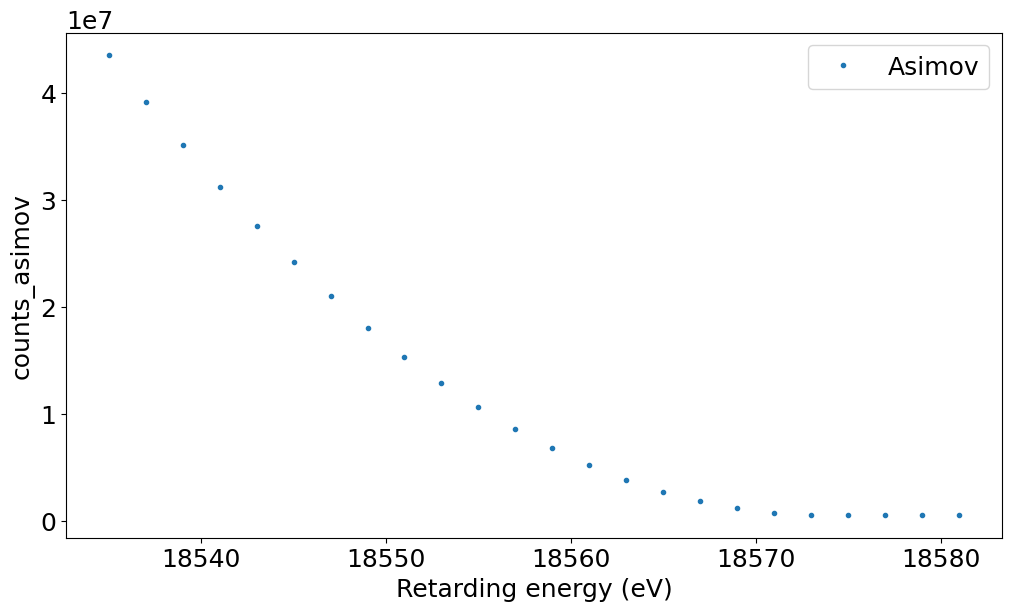

In [16]:
# Calculate Asimov spectrum
rate_asimov = simplified_model(E=Elin, mnu2=0, E0=18573.7, N=1, B=0.2) # asimov rate
counts_asimov = rate_asimov*ttot*tlin # counts = rate * time
print(counts_asimov)

# Plot Asimov spectrum in terms of rate
plt.rcParams.update({'font.size':18});
fig, ax = plt.subplots(constrained_layout=True, figsize=(10,6));
ax.plot(Elin, counts_asimov, '.', label="Asimov");

plt.locator_params(axis='x', nbins=6);
ax.set_xlabel("Retarding energy (eV)");
ax.set_ylabel("counts_asimov");
ax.legend();

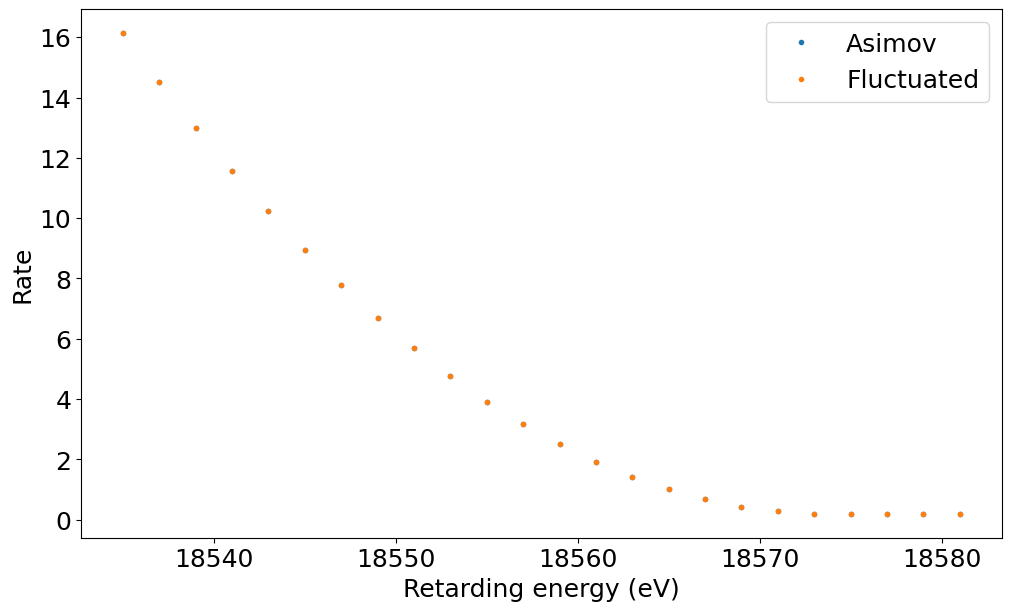

In [17]:
# Generate fluctuated spectra

fluctuated_spectra = [] # fluctuated_spectra is the count of generated random data, also rate
for c in counts_asimov:
    fluctuated_spectra.append(np.random.poisson(lam=c, size=1000)) # number of fluctuated spectra
fluctuated_spectra = np.array(fluctuated_spectra).T # fluctuated spectra are given in counts per energy point 
# print(fluctuated_spectra)
# Plot one fluctuated spectrum together with the Asimov one (in terms of rate)
plt.rcParams.update({'font.size':18});
fig, ax = plt.subplots(constrained_layout=True, figsize=(10,6));
ax.plot(Elin, rate_asimov, '.', label="Asimov");
ax.plot(Elin, fluctuated_spectra[0]/(tlin*ttot), '.', label="Fluctuated"); # with "MISSING"*"MISSING" you convert counts to rate

plt.locator_params(axis='x', nbins=6);
ax.set_xlabel("Retarding energy (eV)");
ax.set_ylabel("Rate");
ax.legend();

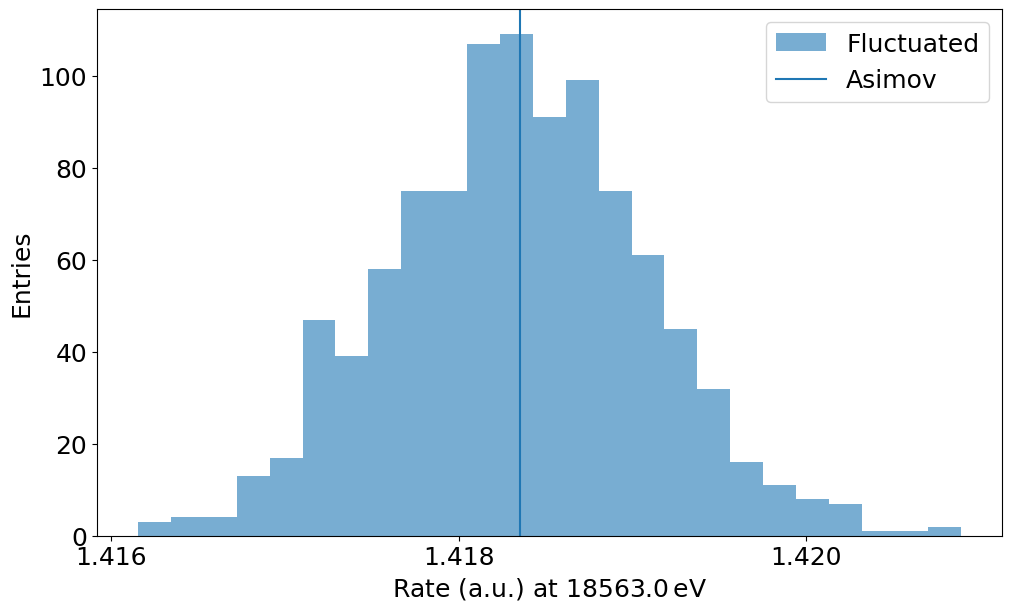

In [18]:
# Plot one qU point as cross-check

qUIndex = 14# Get the point in the spectrum by index
asimov = counts_asimov[qUIndex]/(tlin*ttot)[qUIndex] # with "MISISNG"*"MISSING" you convert counts to rate
fluctuated = fluctuated_spectra[:, qUIndex]/(tlin*ttot)[qUIndex] # with "MISSING"*"MISSING" you convert counts to rate
# print(np.shape(fluctuated_spectra))
# sum_array = fluctuated_spectra.sum(axis = 0)
# print(np.shape(sum_array))

plt.rcParams.update({'font.size':18});
fig, ax = plt.subplots(constrained_layout=True, figsize=(10,6));
ax.hist(fluctuated, bins=25, alpha=0.6, label=f"Fluctuated")
ax.axvline(asimov, label="Asimov")

plt.locator_params(axis='x', nbins=5);
ax.set_xlabel(f"Rate (a.u.) at {Elin[qUIndex]:.1f}" +r"$\,$eV");
ax. ticklabel_format(useOffset=False)
ax.set_ylabel("Entries");
ax.legend();

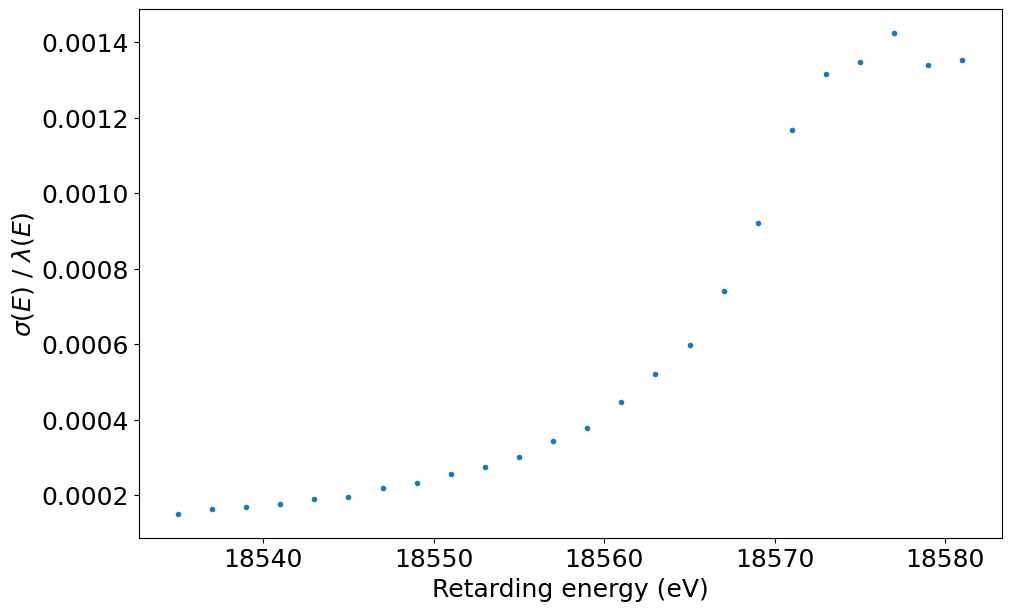

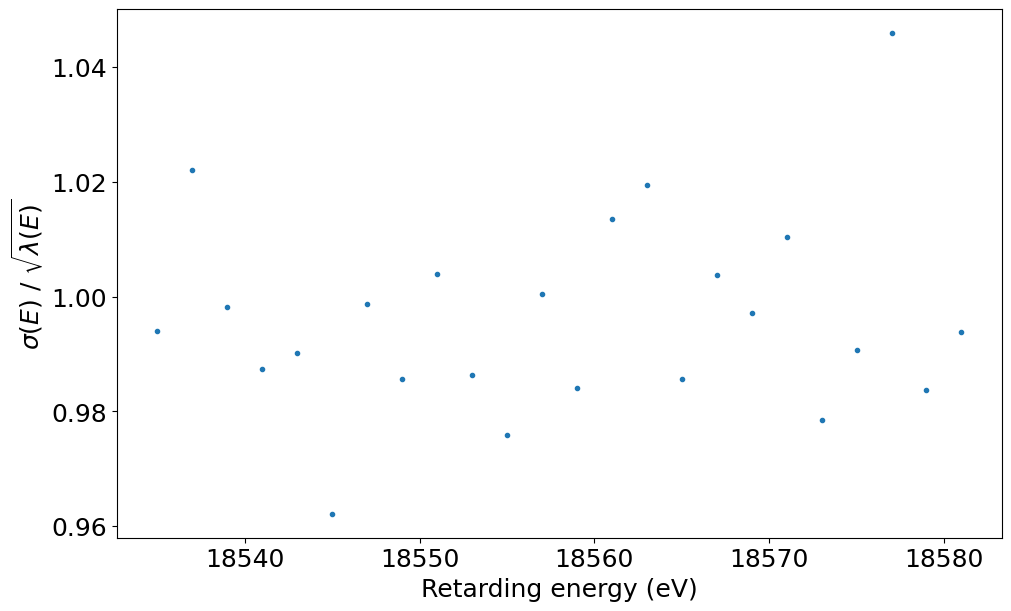

In [20]:
# Calculate standard deviation at each E
sigma = np.std(fluctuated_spectra, axis=0) # standard deviation of the fluctuated spectra
# print(sigma)

# Plot the standard deviation vs lambda
plt.rcParams.update({'font.size':18});
fig, ax = plt.subplots(constrained_layout=True, figsize=(10,6));
ax.plot(Elin, sigma/counts_asimov, '.');

plt.locator_params(axis='x', nbins=6);
ax.set_xlabel("Retarding energy (eV)");
ax.set_ylabel(r"$\sigma(E)$ / $\lambda(E)$");

# Plot the standard deviation vs the expectation (=sqrt(counts))
plt.rcParams.update({'font.size':18});
fig, ax = plt.subplots(constrained_layout=True, figsize=(10,6));
ax.plot(Elin, sigma/np.sqrt(counts_asimov), '.');

plt.locator_params(axis='x', nbins=6);
ax.set_xlabel("Retarding energy (eV)")
ax.set_ylabel(r"$\sigma(E)$ / $\sqrt{\lambda(E)}$");

In [21]:
### 4.2.2 Parameter Inference ###

In [24]:
print(fluctuated_spectra[:,])

[[43547885 39212641 35111019 ...   541471   541100   538942]
 [43532079 39204906 35112874 ...   539919   540942   540069]
 [43540461 39211003 35090946 ...   539933   540236   541153]
 ...
 [43526470 39203675 35107994 ...   540466   540382   538699]
 [43540458 39205320 35103181 ...   539595   538891   540888]
 [43537789 39206765 35115715 ...   540343   540673   540028]]


In [25]:
def chisquared(func, xdata: np.array, ydata: np.array, pmodel: np.array, sigma: np.array) -> float:
    """Returns the chi squared for given function and values.

    Parameters
    ----------
    func: Model function.
    xdata: Data of the x-axis.
    ydata: Data of the y-axis. Must have the same shape as xdata.
    pmodel: Model parameters
    sigma: Uncertainty of ydata. Must have the same shape as xdata of has to be a float.

    Returns
    ----------
    Chi Squared for model and values.
    """
    return np.sum(((func(xdata, *pmodel)-ydata)/ydata)**2) # use the chi squared formula and the parameters defined above

In [26]:
# Define chi2 as a function of parameters for fixed Asimov data
def chi2(params) -> float:
    """Return the chi2 as a function of params"""
    mnu2, E0, B, N = params
    xdata = fluctuated_spectra[:,]
    ydata = rate # rate ? rate_asimov, rate_fluctuated
    sigma = np.sqrt("MISSING")/("MISSING"*"MISSING") # sigma is here the uncertainty on the rate
    return chisquared(func=simplified_model, xdata=xdata, ydata=ydata, pmodel=params, sigma=sigma)

In [27]:
# Fit Asimov data using chi2 minimization
# Initial value of the minimizer for the parameters as array [val1, val2, val3, val4]
x0 = "MISSING" # change one parameter value slightly with regard to the reference values to ensure correct minimization
# Minimize 
result_asimov = optimize.minimize(chi2, x0=x0, method="Nelder-Mead", tol=1e-8)
print("### Fit on Asimov data ###")
print("Best fit at: ", result_asimov.x)
print(f"Chi2 = {result_asimov.fun}")

ValueError: could not convert string to float: 'MISSING'

In [28]:
# Do the same on fluctuated data
Parameters = []
for i, dataset in enumerate("MISSING"): # insert the fluctuated spectra
    # Print progress
    print(f"Progress: {(i+1)/len(fluctuated_spectra)*1E2:.1f}%", end="\r", flush=True)
    # Adapt definition of chi2 for different data
    def _chi2(params) -> float:
        """Return the chi2 as a function of params"""
        xdata = "MISSING"
        ydata = "MISSING"/("MISSING"*"MISSING") # the "MISSING"*"MISSING" converts counts to rate, hint: look over what quantity we iterate
        sigma = np.sqrt("MISSING")/("MISSING"*"MISSING") # the "MISSING"*"MISSING" converts counts to rate
        return chisquared(func=simplified_model, xdata=xdata, ydata=ydata, pmodel=params, sigma=sigma)
    # Initial value for parameters
    x0 = "MISSING" # array [val1, val2, val3, val4]
    # Minimize 
    result = optimize.minimize(_chi2, x0=x0, method="Nelder-Mead", tol=1e-8)
    if result.success:
        Parameters.append([*result.x, result.fun])
    else:
        print(f"Minimization did not converge")
Parameters = np.array(Parameters)

ValueError: could not convert string to float: 'MISSING'

In [ ]:
# Plot parameter distributions
Labels = [r"$m_{\nu}^2$ (eV$^2$)", r"$E_{0}$ (eV)", r"$B$ (cps)", r"N", r"$\chi^2$"]

for param, label in zip(Parameters.T, Labels):
    plt.rcParams.update({'font.size':18});
    fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True);
    ax.hist("MISSING", bins=50, density=True) # hint: look over what we iterate
    
    plt.locator_params(axis='x', nbins=6);
    ax.set_xlabel(label)
    ax.set_ylabel("Normalized entries")
    
    if label == r"$\chi^2$":
        xlin = np.linspace(np.min(param), np.max(param), 500)
        ylin = stats.chi2.pdf(xlin, df="MISSING") # degrees of freedom (df) are number of data points (N_data) MINUS number of fit parameters (N_fit): df = N_data - N_fit
        ax.plot(xlin, ylin, color="tab:orange")